In [112]:
# import relevant Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from skimpy import skim

In [113]:
#IMPORT TRAIN DATASET
train =  pd.read_csv('Train.csv')

#IMPORT TEST DATASET
test =  pd.read_csv('Test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [114]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


#### DATE 

- Convert to valid type 
- CHECK YEAR TO ENSURE VALIDITY
- FIND MISSING YEAR
    - FILL OR DROP MISSING DATES 

<AxesSubplot:>

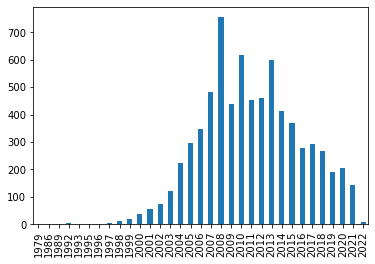

In [115]:
# CLEAN YEAR COLUMN AND 
train.Year = train.Year.str.replace(',','')
train.Year.value_counts().sort_index().plot(kind = 'bar')


In [116]:
from random import randint

# select the 5% and 95%
a = train.Year[train.Year.notna()].astype(int).quantile(0.05)
b = train.Year[train.Year.notna()].astype(int).quantile(0.95)
c = train.Year[train.Year.notna()].astype(int).mean()

randYear = lambda x : randint(a,b)

## FILL NA VALUE WITH RANDOM YEAR IN THE 5% and 95% PERCENTILE
train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)

## CONVERT COLUMN TO INTEGER
train.Year = train.Year.astype(int)

C:\Users\Owner\AppData\Local\Temp/ipykernel_16936/506966339.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Year[train.Year.isna()] = train.Year[train.Year.isna()].apply(randYear)


#### CLEANING DISTANCE COLUMN
- CLEANING STRING AND FILE TYPE CONVERSION

In [117]:
# CLEAN YEAR COLUMN AND 
train.Distance = train.Distance.str.replace(',','')
train.Distance = train.Distance.astype(float)

In [118]:
# rename amount Column
train.rename(columns={"Amount (Million Naira)": "Amount"}, inplace = True)


### OPTION 1 
- using ffill to fill nulls

### DROP COLUMNS
- Drop Vechile ID and Colour

In [119]:
train1 = train.copy()
train1.drop(columns=['VehicleID', 'Colour'], inplace = True)

<AxesSubplot:>

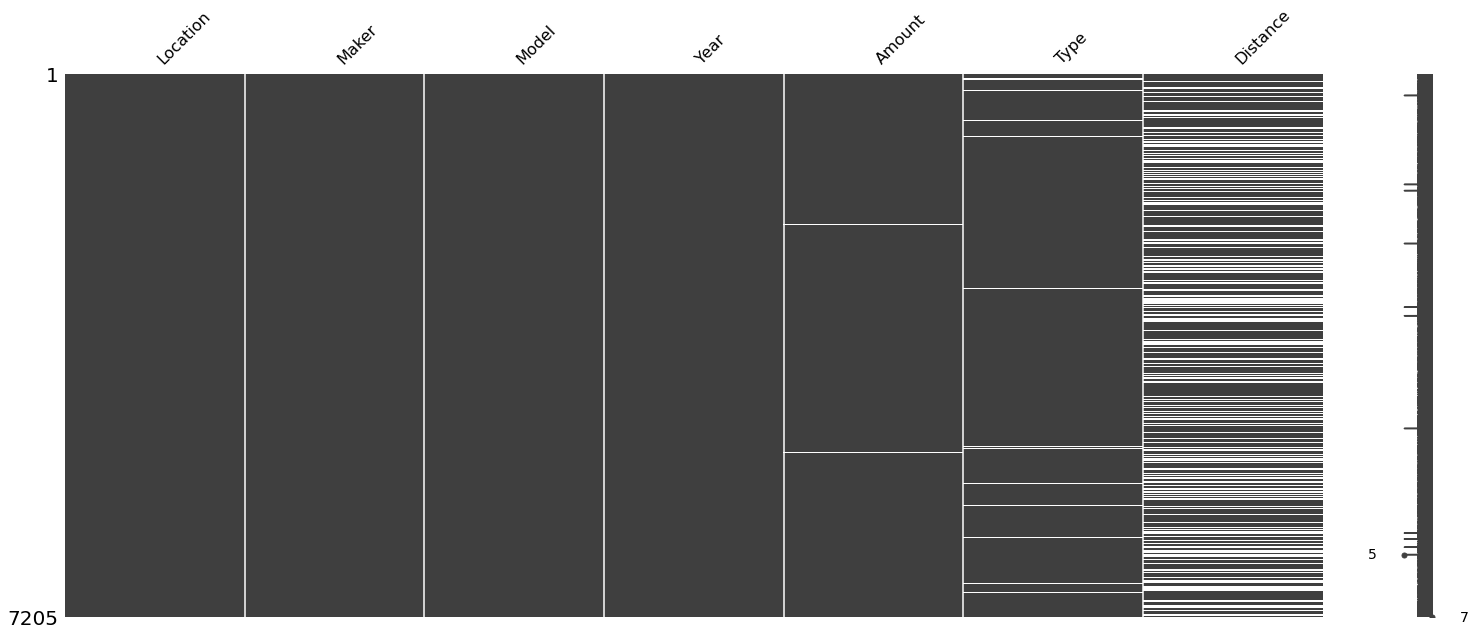

In [120]:
# View distribution of missing values
missingno.matrix(train1)

In [121]:
#sort missing values by categories 
train1.sort_values(by = ['Location', 'Maker', 'Model', 'Year', 'Type' ], inplace = True)
train1.reset_index(drop =True , inplace = True)

In [122]:
## fill Type Colums

def defineType(row):
    
    from random import choice

    if row['Location'] == 'Abuja':
        
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 50000) :
            return 'Foreign Used'
        elif (row['Distance']  > 50000) & (row['Distance']  < 100000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Lagos':
    
        if (row['Distance']  > 0) & (row['Distance']  < 20000):
            return 'Brand New'
        elif (row['Distance']  > 20000) & (row['Distance']  < 90000) :
            return 'Foreign Used'
        elif (row['Distance']  > 90000) & (row['Distance']  < 140000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif row['Location'] == 'Ibadan':
    
         if (row['Distance']  > 0) & (row['Distance']  < 20000):
             return 'Brand New'
         elif (row['Distance']  > 20000) & (row['Distance']  < 100000) :
             return 'Foreign Used'
         elif (row['Distance']  > 100000) & (row['Distance']  < 140000): 
             return choice(['Brand New', 'Foreign Used'])
         else:
             return 'Foreign Used'

In [123]:
train1.Type[train1.Type.isna()] = train1[train1.Type.isna()].apply(defineType, axis =1)


C:\Users\Owner\AppData\Local\Temp/ipykernel_16936/3627145900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Type[train1.Type.isna()] = train1[train1.Type.isna()].apply(defineType, axis =1)


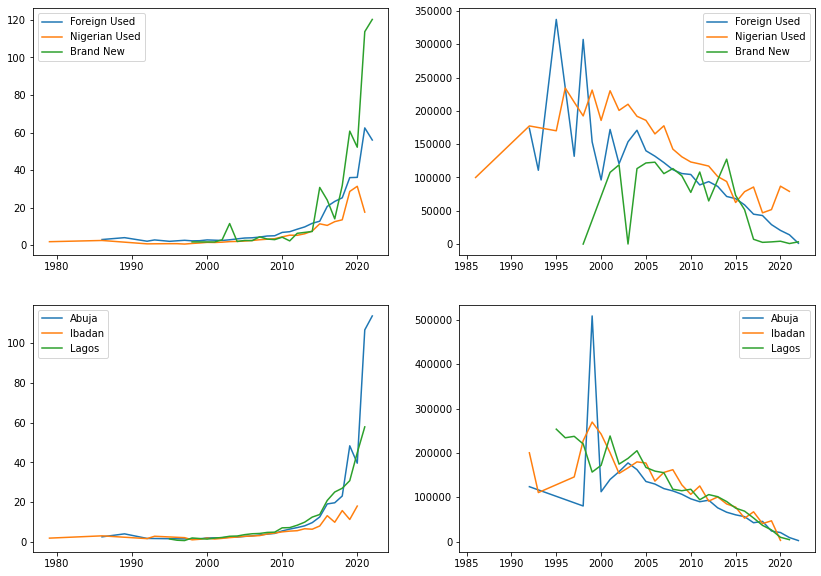

In [124]:


plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects



for i in train1.Type.unique():
    
    ax1.plot(train1[train1.Type == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax2.plot(train1[train1.Type == i].groupby('Year').agg({'Distance' : 'mean'}))
 
    
for i in train1.Location.unique():
    
    ax3.plot(train1[train1.Location == i].groupby('Year').agg({'Amount' : 'mean'}))
    ax4.plot(train1[train1.Location == i].groupby('Year').agg({'Distance' : 'mean'}))
    
    
ax1.legend(train1.Type.unique())
#ax1.title('Price Distribution by Year and Type')

ax2.legend(train1.Type.unique())
#ax2.title('Distance Distribution by Year and Type')

ax3.legend(train1.Location.unique())
#ax3.title('Price Distribution by Year and Location')

ax4.legend(train1.Location.unique())
#ax2.title('Distance Distribution by Year and Location')

In [134]:
#FILL MISSING AMOUNTS WITH 'FFILL'
train1.Amount.fillna(method= 'pad', inplace=True)

# TEST
a1_test = train1[train1.Distance.isna()].drop(columns= ['Model', 'Distance', 'Maker'])

#TRAIN
a1_train = train1[~train1.Distance.isna()].drop(columns= ['Model', 'Maker'])
a1_trainTarget = a1_train.Distance
a1_train.drop(columns= 'Distance', inplace= True)

#CONVERT TO MACHINE READABLE
a1_train = pd.get_dummies(a1_train)
a1_test  = pd.get_dummies(a1_test)


#EVAL DISTANCE USING RANDOM FOR ATTAINING MISSING DISTANCE
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#Train Model
model.fit(a1_train, a1_trainTarget)

# Make PREDICTIONS 
model.predict(a1_test)
train1.Distance[train1.Distance.isna()] = model.predict(a1_test)


C:\Users\Owner\AppData\Local\Temp/ipykernel_16936/762091757.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.Distance[train1.Distance.isna()] = model.predict(a1_test)


In [133]:
a1_test.head(3)

,Year,Amount,Location_Abuja,Location_Ibadan,Location_Lagos,Type_Brand New,Type_Foreign Used,Type_Nigerian Used
0,2013,4.5,1,0,0,0,1,0
4,2014,12.0,1,0,0,0,1,0
6,2015,6.3,1,0,0,0,1,0


#### TRIAL 1 
- PERDICTION WITHOUT USING DISTANCE AND COLOUR AS VARIABLES

In [127]:
def defineType(location, distance):
    from random import choice 
    
    if location == 'Abuja':
        
        if (distance > 0) & (distance < 20000):
            return 'Brand New'
        elif (distance > 20000) & (distance < 50000) :
            return 'Foreign Used'
        elif (distance > 50000) & (distance < 100000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif location == 'Lagos':
    
        if (distance > 0) & (distance < 20000):
            return 'Brand New'
        elif (distance > 20000) & (distance < 90000) :
            return 'Foreign Used'
        elif (distance > 90000) & (distance < 140000): 
            return choice(['Brand New', 'Foreign Used'])
        else:
            return 'Foreign Used'
        
    elif location == 'Ibadan':
    
         if (distance > 0) & (distance < 20000):
             return 'Brand New'
         elif (distance > 20000) & (distance < 100000) :
             return 'Foreign Used'
         elif (distance > 100000) & (distance < 140000): 
             return choice(['Brand New', 'Foreign Used'])
         else:
             return 'Foreign Used'

In [128]:
train_1 = train.copy()
train_1 =

SyntaxError: invalid syntax (Temp/ipykernel_16936/3223156618.py, line 2)